In [5]:
import anndata
import scanpy as sc
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import sopa
import sopa.spatial

heatmap_kwargs = {"vmax": 40, "cmap": sns.cm.rocket_r, "cbar_kws": {'label': 'Mean hop distance'}}

## 1. Setting the data 

import data, with a cell type annotation, and with the spatial coordinates set in obsm

In [6]:
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_1_RCTD_lvl3.h5ad"
chuvio_L1_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_2_RCTD_lvl3.h5ad"
chuvio_L1_2 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L2_1_RCTD_lvl3.h5ad"
chuvio_L2_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L3_1_RCTD_lvl3.h5ad"
chuvio_L3_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L4_1_RCTD_lvl3.h5ad"
chuvio_L4_1 = sc.read_h5ad(path)

In [10]:
#Setting spatial coordinates set in obsm
chuvio_L1_1.obsm['spatial'] = chuvio_L1_1.obs[['x_centroid', 'y_centroid']].to_numpy()
chuvio_L1_2.obsm['spatial'] = chuvio_L1_2.obs[['x_centroid', 'y_centroid']].to_numpy()
chuvio_L2_1.obsm['spatial'] = chuvio_L2_1.obs[['x_centroid', 'y_centroid']].to_numpy()
chuvio_L3_1.obsm['spatial'] = chuvio_L3_1.obs[['x_centroid', 'y_centroid']].to_numpy()
chuvio_L4_1.obsm['spatial'] = chuvio_L4_1.obs[['x_centroid', 'y_centroid']].to_numpy()

In [11]:
sopa.spatial.spatial_neighbors(chuvio_L1_1, radius=[0, 50])

[INFO] (sopa.spatial._build) Computing delaunay graph


In [17]:
chuvio_L1_1.obs["RCTD_lvl3"]

L1_1_aaaadbga-1                   DC_2
L1_1_aaaajnma-1    Endothelia_vascular
L1_1_aaadecno-1               Pericyte
L1_1_aaafkiae-1    Endothelia_vascular
L1_1_aaahijio-1               Pericyte
                          ...         
L1_1_oielkile-1    Endothelia_vascular
L1_1_oieofjmb-1             Fibroblast
L1_1_oieokhmm-1    Endothelia_vascular
L1_1_oifafdfc-1                  Tu_L1
L1_1_oifameeo-1                  Tu_L1
Name: RCTD_lvl3, Length: 71187, dtype: category
Categories (24, object): ['B_cell', 'B_plasma', 'DC_1', 'DC_2', ..., 'T_CTL', 'T_CXCL13', 'T_reg', 'Tu_L1']

## 2. Distances between cell categories

In [18]:
cell_type_to_cell_type = sopa.spatial.mean_distance(chuvio_L1_1, "RCTD_lvl3", "RCTD_lvl3")

100%|██████████| 24/24 [00:00<00:00, 24.72it/s]


<Axes: xlabel='RCTD_lvl3', ylabel='RCTD_lvl3'>

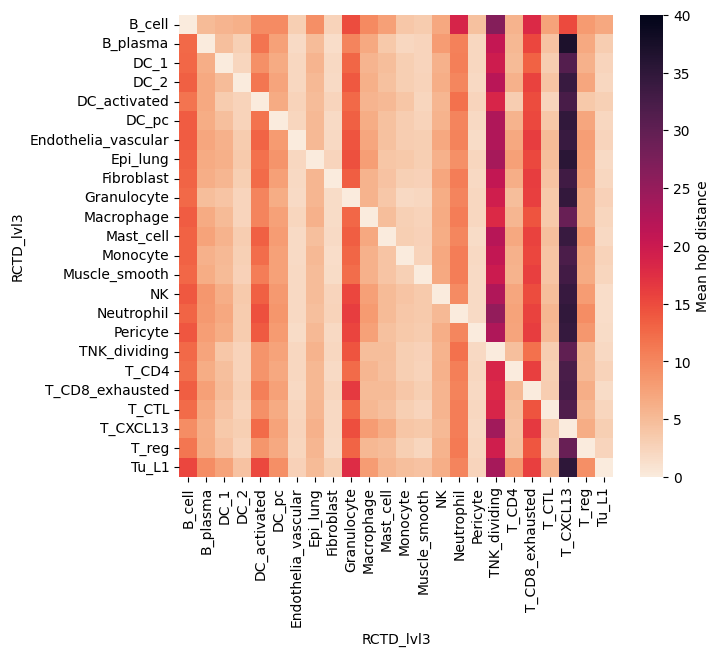

In [19]:
plt.figure(figsize=(7, 6))
sns.heatmap(cell_type_to_cell_type, **heatmap_kwargs)

## 5. Cell-type / Niche network¶

In [26]:
import networkx as nx
from community import community_louvain
from netgraph import Graph

In [28]:
weights, node_color, node_size, node_shape = sopa.spatial.prepare_network(chuvio_L1_1, "cell_type")

TypeError: prepare_network() missing 1 required positional argument: 'niche_key'